# Employ Attrition Prediction

#### Problem Statement: Examined key drivers of employee attrition in a company and developed prediction models

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("C:\\Users\\MAHIMA\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

#### Variables with one 1 unique value will not affect the predictions, therefore we will drop them.

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [7]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [8]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [9]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [10]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


### Correlation Matrix

In [11]:
df1 = df.copy()

In [12]:
df1 = df1.drop(object_col, axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

<Axes: >

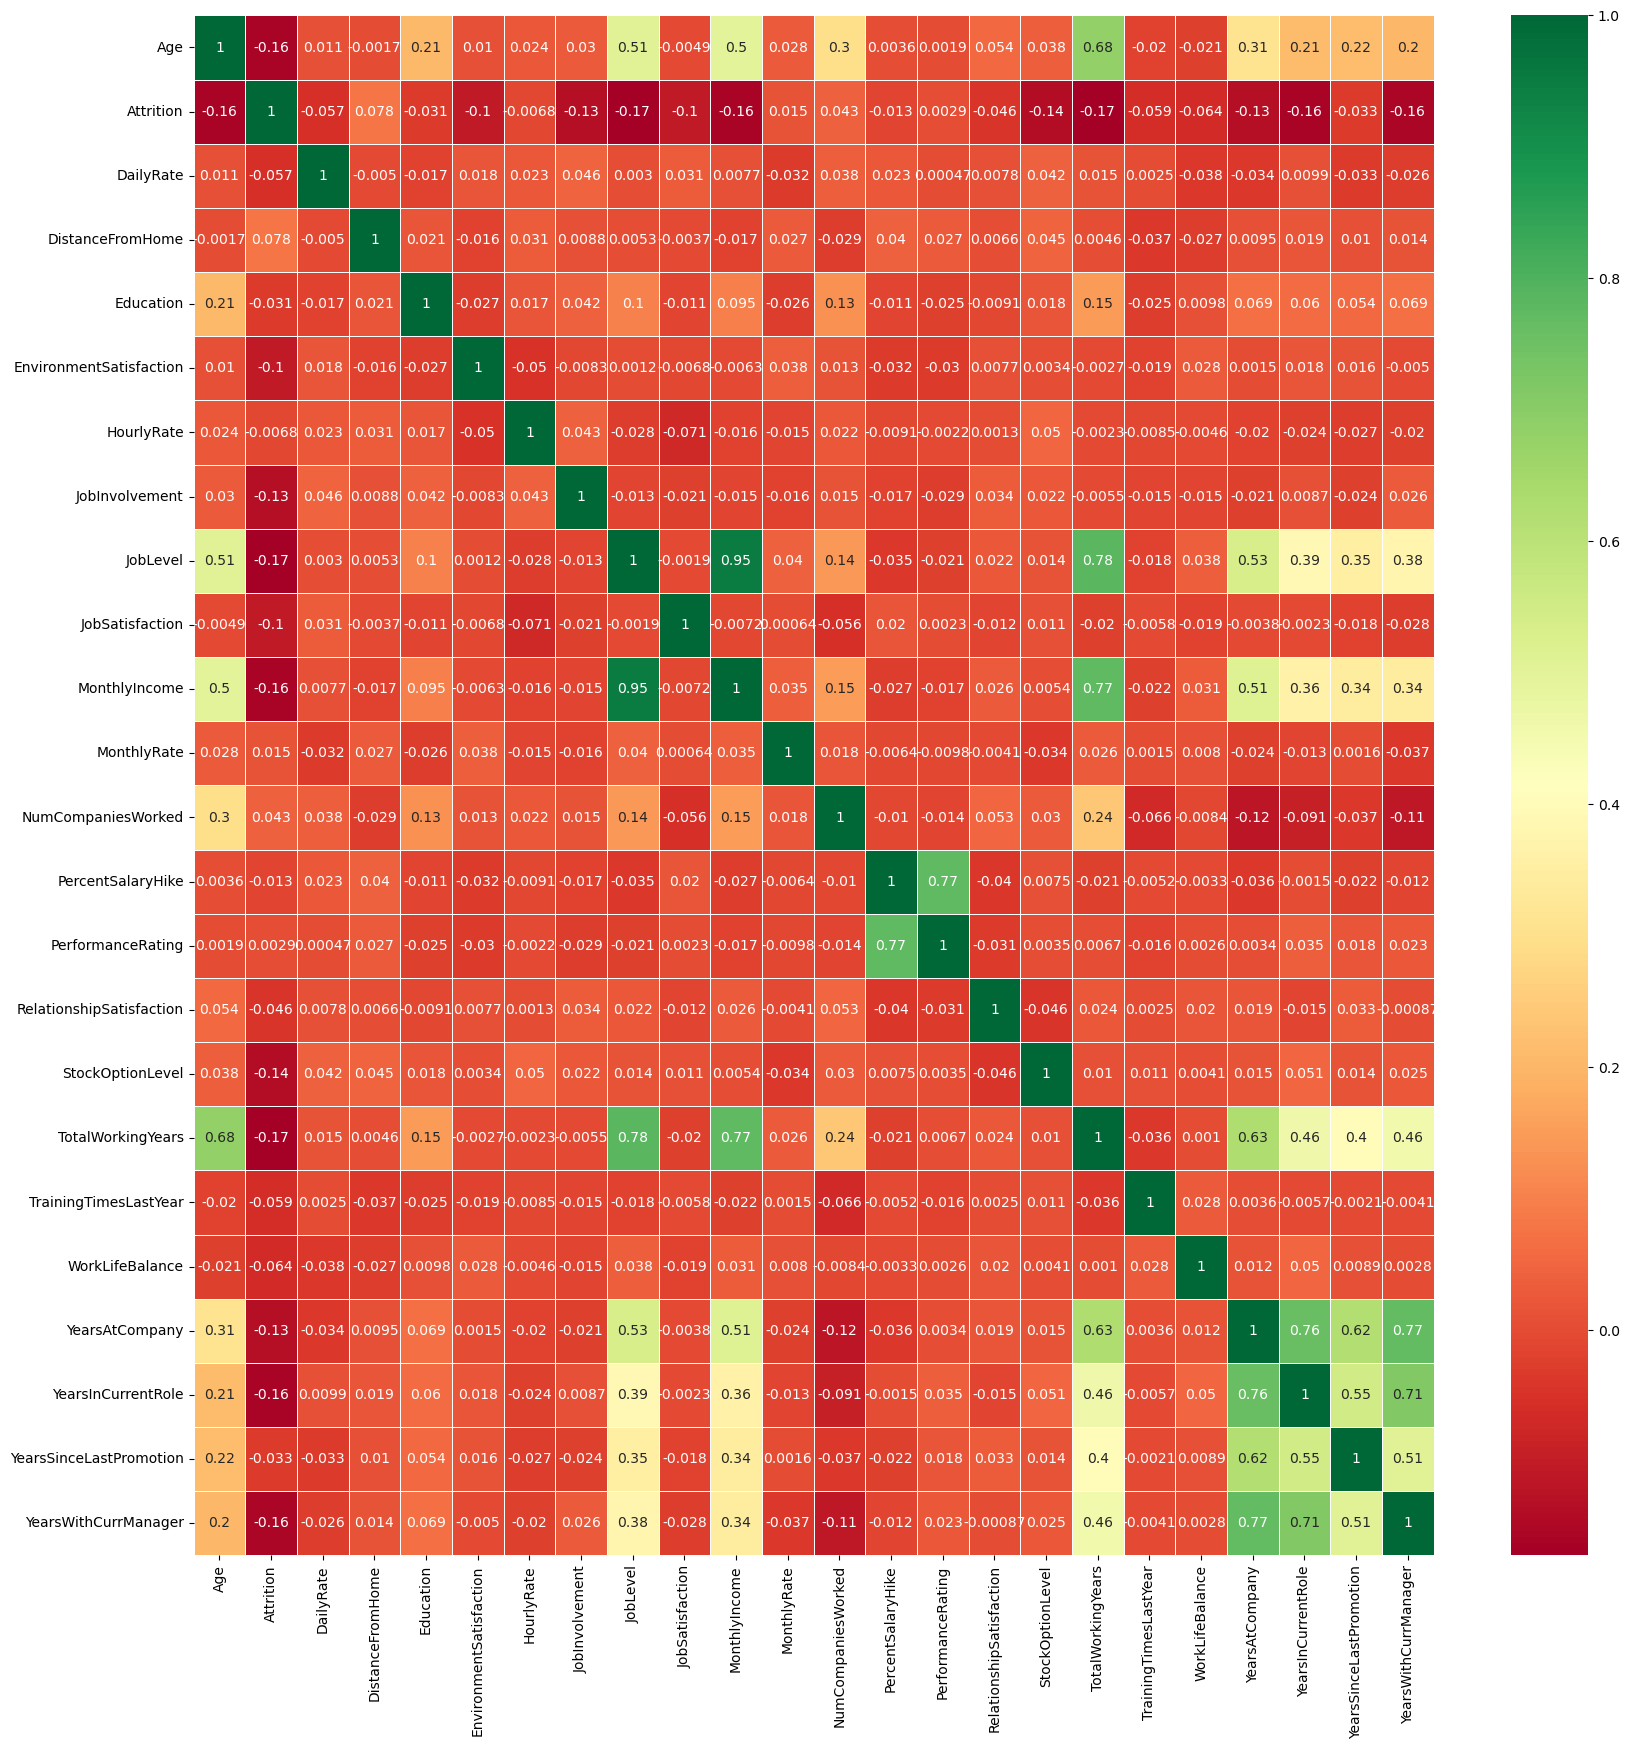

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), annot=True, cmap="RdYlGn", linewidths=0.5)

#### Correlation Analysis:

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

<Axes: >

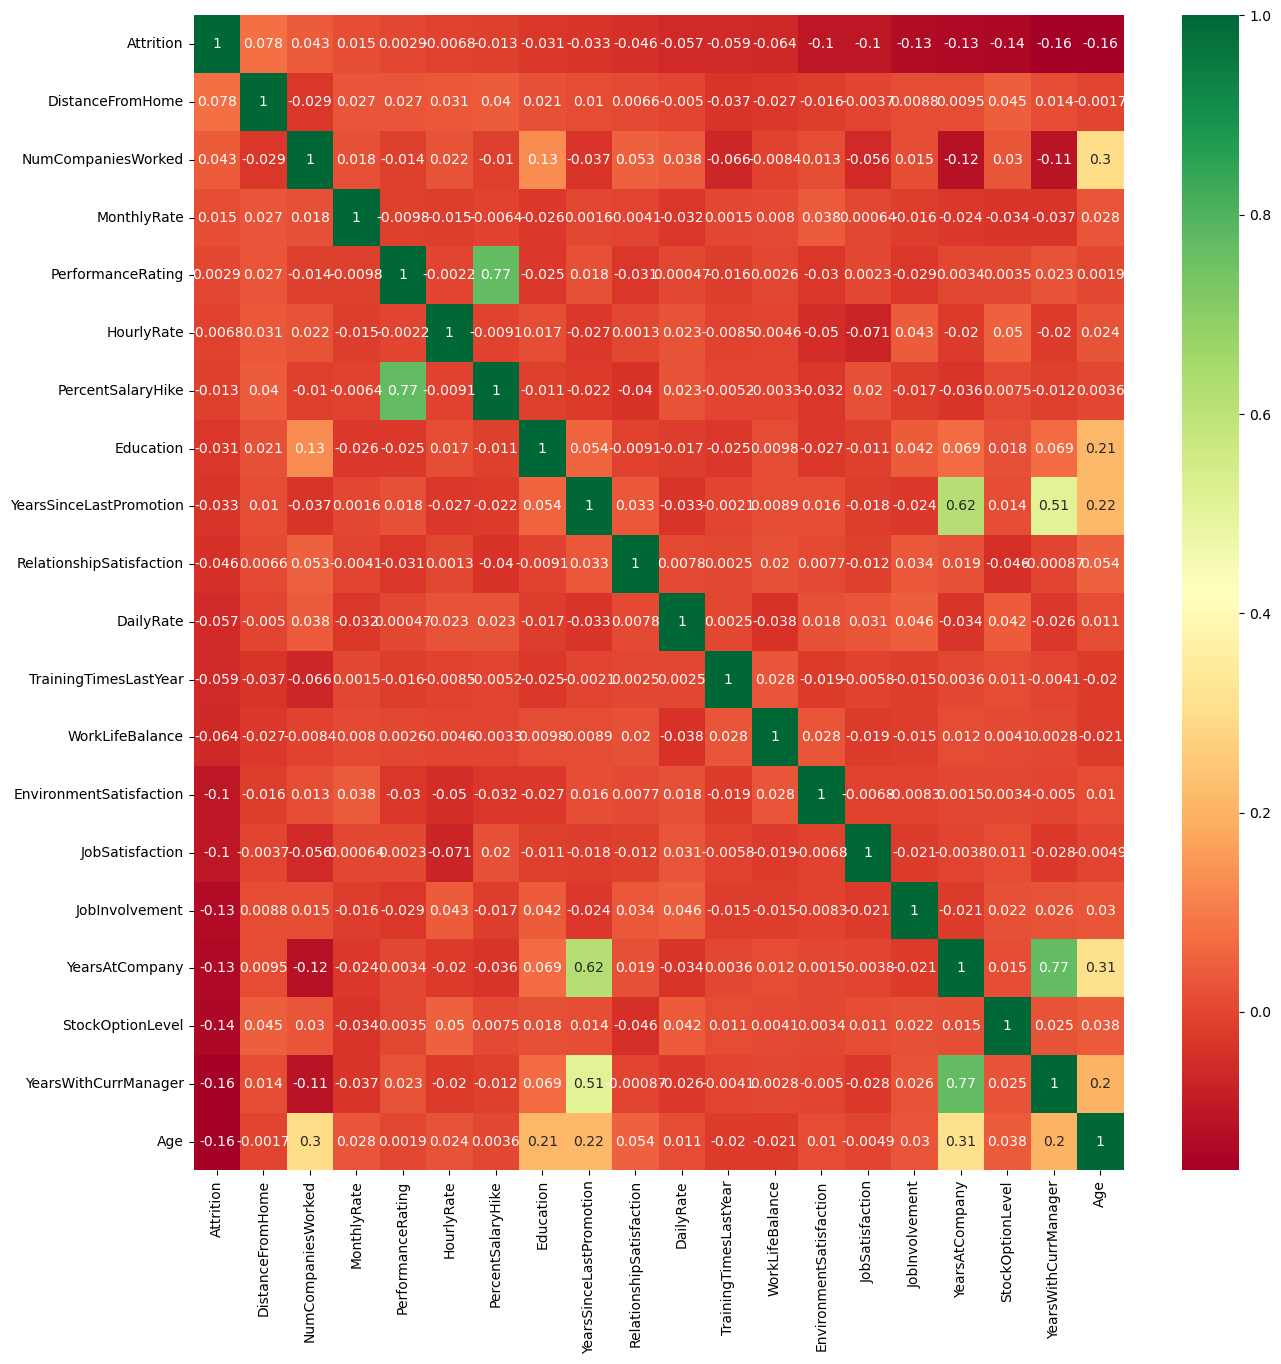

In [14]:
col = df1.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df1[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

Attribution has strongly positive relation with
- Distance from Home
- Numbers of companies worked
- Mothly rate 

And strong negative relation with:
- Age
- Years with current manager
- Years at company
- Job satisfaction

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0


## Data Preprocessing 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [17]:
data = pd.get_dummies(df, drop_first=True, dtype='uint8')
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,0,155,4,3,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


In [18]:
data.shape

(1470, 45)

## Model Formation

In [19]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X.shape)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1470, 44)
(1176, 44)
(294, 44)
(1176,)
(294,)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_std = scaler.transform(X)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print (lr)

LogisticRegression()


In [23]:
y_test_pred= lr.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
y_train_pred = lr.predict(X_train)

In [25]:
from sklearn.metrics import accuracy_score
print(f"Accuracy for Training Data: {accuracy_score (y_train,y_train_pred):.4f}")
print(f"Accuracy for Testing Data: {accuracy_score (y_test,y_test_pred):.4f}")

Accuracy for Training Data: 0.8903
Accuracy for Testing Data: 0.8810


In [26]:
#Display Confusion Matrix 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_test_pred)
print (f"Test Confusion Matrix: \n{cm}")

Test Confusion Matrix: 
[[241  14]
 [ 21  18]]


In [27]:
#Display Classification Report 
from sklearn.metrics import classification_report
print("Test Classification Report For Logestic Regression")
print(classification_report(y_test,y_test_pred))

Test Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294



### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train,y_train)
print (KNN)

KNeighborsClassifier()


In [29]:
y_testpred = KNN.predict(X_test)
print (y_testpred)

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_testpred)
print (f"Test Confusion Matrix: \n{cm}")

Test Confusion Matrix: 
[[252   3]
 [ 32   7]]


In [31]:
#Display Accuracy 
from sklearn.metrics import accuracy_score
print(f"Accuracy for Testing Data: {accuracy_score (y_test,y_testpred):.4f}")

Accuracy for Testing Data: 0.8810


In [32]:
from sklearn.metrics import classification_report
print("Test Classification Report")
print(classification_report(y_test,y_testpred,))

Test Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.70      0.18      0.29        39

    accuracy                           0.88       294
   macro avg       0.79      0.58      0.61       294
weighted avg       0.86      0.88      0.85       294



## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (criterion = 'entropy')
dtc.fit (X_train,y_train)
print (dtc)

DecisionTreeClassifier(criterion='entropy')


In [34]:
y_test_pred= dtc.predict(X_test)
print (y_test_pred)

[0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]


In [35]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,y_test_pred)
print (f"Test Confusion Matrix: \n{cm}")

Test Confusion Matrix: 
[[220  35]
 [ 31   8]]


In [36]:
print(f"Accuracy for Testing Data: {accuracy_score (y_test,y_test_pred):.4f}")

Accuracy for Testing Data: 0.7755


In [37]:
from sklearn.metrics import classification_report
print("Test Classification Report")
print(classification_report(y_test,y_test_pred))

Test Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.19      0.21      0.20        39

    accuracy                           0.78       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.78      0.78       294



## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50, criterion='entropy')
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [39]:
RF_test_pred = RF.predict(X_test)

In [40]:
cm = confusion_matrix (y_test,RF_test_pred)
print (f"Test Confusion Matrix: \n{cm}")

Test Confusion Matrix: 
[[253   2]
 [ 35   4]]


In [41]:
print(f"Accuracy for Testing Data: {accuracy_score (y_test,RF_test_pred):.4f}")

Accuracy for Testing Data: 0.8741


In [42]:
print("Test Classification Report")
print(classification_report (y_test,RF_test_pred))

Test Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



## Conclusion

F1 Scores of the Models for class Attrition = Yes are as follows:
- Logistic Regression Accuracy: 0.51
- KNN Accuracy: 0.29
- Decision Tree Accuracy: 0.20
- Random Forest Accuracy: 0.18

#### Logistic Regression gives the best Predictions for Employee Attrition based on the explored factors.